# End-to-End Stock Prediction Project using Multiple Linear Regression:

## Step 1: Installing Required Libraries ##

First we install the Python libraries we need:

- yfinance – to fetch real-time stock data

- pandas – for data manipulation

- numpy – for numerical calculations

- scikit-learn – for building and evaluating ML models

- matplotlib – for plotting results

We installed these libraries by typing the command **"%pip install yfinance pandas numpy scikit-learn matplotlib"** in the next cell of the Jupyter notebook.


In [13]:
%pip install yfinance pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries ##

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

We import the necessary modules so we can use their functions in our code.

## Step 3: Loading Stock Data ##

In [15]:
data = yf.download("AAPL", period="6mo", interval="1d")
data = data[['Close', 'Volume']]


[*********************100%***********************]  1 of 1 completed


We used yfinance to download the last 6 months of Apple's daily stock data, and keep only the Close price and Volume (number of shares traded).

## Step 4: Adding Technical Indicators ##

In [16]:
# RSI
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0).rolling(window=period).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# MACD
ema12 = data['Close'].ewm(span=12, adjust=False).mean()
ema26 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema12 - ema26
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# RSI
data['RSI'] = compute_rsi(data['Close'])

# Moving Average
data['MA_10'] = data['Close'].rolling(window=10).mean()

# Target: next day's close
data['Target'] = data['Close'].shift(-1)

# Drop rows with NaN
data.dropna(inplace=True)


RSI helps detect if a stock is overbought (>70) or oversold (<30). It’s a momentum indicator.

MACD shows the relationship between two moving averages. It helps identify trends and potential buy/sell signals.

- MA_10: Smoothens price using 10-day average

- Target: The next day's closing price (what we’re trying to predict)

- dropna(): Remove any rows with missing values caused by moving averages or RSI needing "history"


## Step 5: Preparing Data ##

In [17]:
features = ['Close', 'Volume', 'MACD', 'Signal', 'RSI', 'MA_10']
X = data[features]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


Separating our data into:

- X: input features

- y: the target (next day’s closing price)

Then split them into training and testing datasets so you can evaluate your model later.

## Step 6: Training the Model ##

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In this step, we initialize and train a Multiple Linear Regression model using the training data.

## Step 7: Evaluating the Model ##

In [19]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 20.182438742888845
R² Score: 0.46421278415652945


- MSE: How far off the predictions are (lower = better)

- R²: How well the model explains the variation in the target (closer to 1 = better)

## Step 8: Plotting Predictions ##

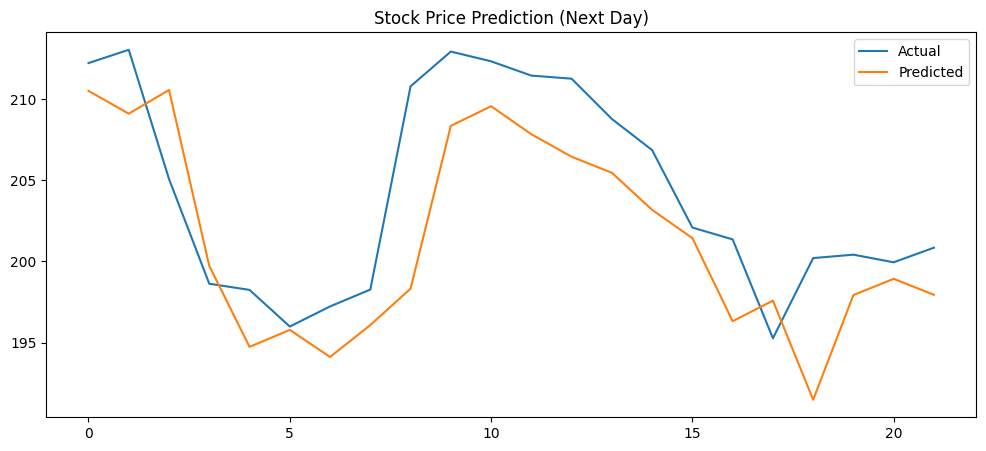

In [20]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Stock Price Prediction (Next Day)")
plt.show()


We visualize how close the model’s predictions are to the real values. In this step, we should see if the model is capturing the trend accurately.

## Observations from the plot ##

- **General Trend Matching:**
The predicted values (orange line) generally follow the direction of the actual prices (blue line), especially in rising and falling trends. This suggests the model understands basic market movement; this is a good sign.

- **Underfitting:**
The predicted line appears smoother and less responsive to sharp changes. For example, where the actual price sharply rises or falls, the prediction reacts more slowly or not as strongly. This indicates underfitting, where the model isn’t capturing all the complexities of the data.

- **Lag in Prediction:**
There’s a noticeable lag — predicted values seem to follow the actual curve but delayed.

- **Amplitude Difference:**
The predicted prices have lower variation compared to actual prices. The model is likely being cautious and averaging things out too much.